In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Fetch LFW dataset with minimum faces per person = 40
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
# Extracting data and target labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
# df = np.genfromtxt('./lfw_people.csv',delimiter=',')
# X = df[:, :-1]
# y = df[:, -1]
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

# Print dataset statistics
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)


Number of samples: 1777
Number of features: 1850
Number of classes: 17


In [13]:
# from main import fetch_dataset, fetch_data_details, split_data, dimensionality_reduction_LDA, train_text_transform_LDA, classification_svc, prediction, print_report, plot_images, title, plot_images_lda
from sklearn.decomposition import PCA, FastICA, NMF

# # Load data
# dataset = fetch_lfw_people(min_faces_per_person=100)

# # get dataset details and target names
# n_samples, height, width = dataset.images.shape

# X = dataset.data
# n_features = X.shape[1]

# # the label to predict is the id of the person
# y = dataset.target
# target_names = dataset.target_names
# n_classes = target_names.shape[0]

# print("Total DATASET size:")
# print("n_samples: %d" % n_samples)
# print("n_features: %d" % n_features)
# print("n_classes: %d" % n_classes)

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# compute LDA
n_components = 200

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components).fit(X_train)

lda = LDA().fit(pca.transform(X_train), y_train)

# lda, pca = dimensionality_reduction_LDA(n_components, X_train, y_train)

X_train_lda = lda.transform(pca.transform(X_train))
X_test_lda = lda.transform(pca.transform(X_test))
# X_train_lda, X_test_lda = train_text_transform_LDA(lda, pca, X_train, X_test)












# # Training a SVM classification model
# clf = classification_svc(X_train_lda, y_train)

# # Quantitative evaluation of the model quality on the test set
# y_pred = prediction(clf, X_test_lda)

# # printing classification report
# print_report(y_test, y_pred, target_names, n_classes)

# # printing images
# prediction_titles = [title(y_pred, y_test, target_names, i)
#                      for i in range(y_pred.shape[0])]

# plot_images(X_test, prediction_titles, height, width)

# # plot fisherfaces
# fisherface_titles = ["fisherface %d" % i for i in range(4)]
# plot_images_lda(pca, lda, fisherface_titles, height, width)

Extracting the top 200 eigenfaces from 912 faces


In [14]:
X_train_lda.shape

(912, 4)

# LDA Implementation

(1510, 16)
(1850, 16)


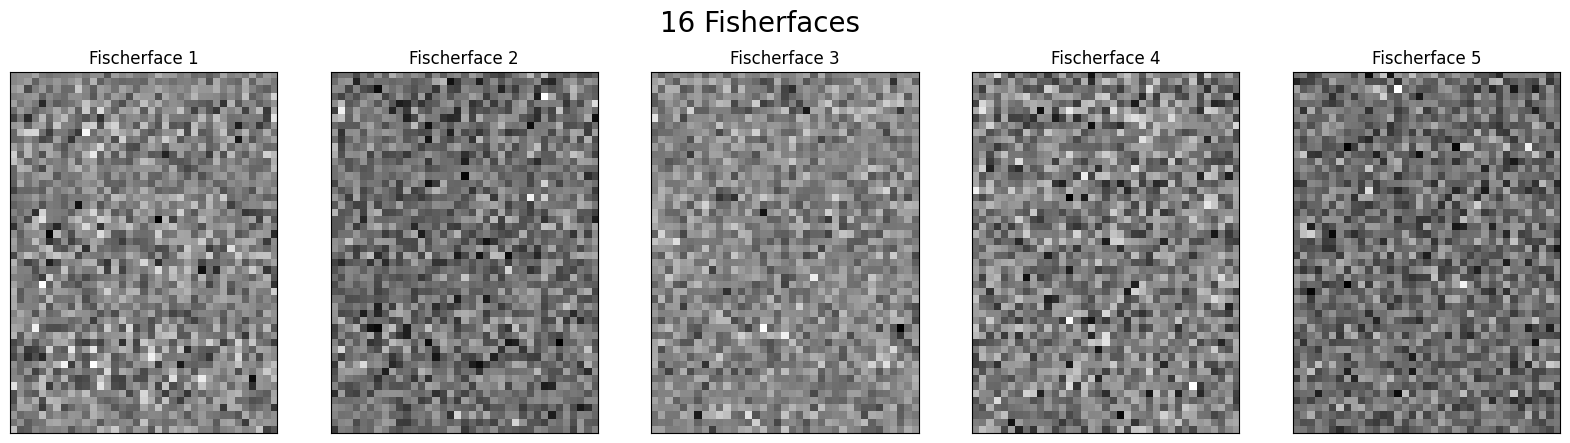

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15,stratify=y)
n_components=len(np.unique(Y_train)) - 1  # To reduce the data into n_components features.

lda = LDA()
X_projected = lda.fit_transform(X_train, Y_train)
X_test_projected = lda.transform(X_test)
print(X_projected.shape)

principal_components = lda.scalings_
print(principal_components.shape)
fisherfaces = principal_components.reshape((n_components,50,37))
plt.figure(figsize=(20, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(fisherfaces[i], cmap='gray')
    plt.title(f"Fischerface {i + 1}")
    plt.xticks(())
    plt.yticks(())
plt.suptitle(str(n_components)+" Fisherfaces",size = 20)
plt.show()